The Dataset containing the Text and its appropriate emoji label is used to train 
a CNN LSTM Deep Learning Model to predict the emoji(associated emotions) for a sentense

The CNN-LSTM architecture captures unique local features in the data(using CNN component) and extracts the higher level positions significance(Using LSTM)

Some interesting Trends associated with text and their emotions are revealed.

In [ ]:
import tensorflow as tf
import string
import requests
import pandas as pd

In [205]:
data=pd.read_csv('Train.csv')
data[:5]

,Unnamed: 0,TEXT,Label
0,0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,2,Been friends since 7th grade. Look at us now w...,2
3,3,This is what it looks like when someone loves ...,3
4,4,RT @user this white family was invited to a Bl...,3


        The Emotion associated with the Label

In [293]:
dataLabel=pd.read_csv('Mapping.csv')
dataLabel

,Unnamed: 0,emoticons,number
0,0,😜,0
1,1,📸,1
2,2,😍,2
3,3,😂,3
4,4,😉,4
5,5,🎄,5
6,6,📷,6
7,7,🔥,7
8,8,😘,8
9,9,❤,9


Seperating the text for tokenisation

In [111]:

datat=data.TEXT
datat[1]

'Oh Wynwood, you’re so funny! : @user #Wynwood #Art #ItWas3AM #Flowers #Vibes @ Wynwood…\n'

Combining all the text 

In [112]:
datnew=[]
for d in datat:
    datnew.append(d)

In [113]:
datat=" ".join(datnew)

Remove punctuations, so on

In [115]:
def clean_text(doc):
    tok=[]
    for c in doc:
        
        tokens=c.split()
        table=str.maketrans('','',string.punctuation)
        tokens=[w.translate(table) for w in tokens]
        tokens=[word for word in tokens if word.isalpha()]
        tokens=[word.lower() for word in tokens]
        tok.append(tokens)
    return tok

In [116]:
tokens=clean_text(datnew)
print(tokens[:10])

[['vacation', 'wasted', 'photobomb', 'tired', 'vacationwasted', 'miami', 'port'], ['oh', 'wynwood', 'so', 'funny', 'user', 'wynwood', 'art', 'flowers', 'vibes'], ['been', 'friends', 'since', 'grade', 'look', 'at', 'us', 'now', 'we', 'all', 'following', 'our', 'dreams', 'doing', 'what', 'we', 'love'], ['this', 'is', 'what', 'it', 'looks', 'like', 'when', 'someone', 'loves', 'you', 'unconditionally', 'oh', 'puppy', 'brother'], ['rt', 'user', 'this', 'white', 'family', 'was', 'invited', 'to', 'a', 'black', 'barbecue', 'and', 'ive', 'never', 'laughed', 'so', 'hard', 'in', 'my', 'life'], ['track', 'season', 'im', 'ready', 'for', 'ya', 'university', 'of', 'the', 'incarnate', 'word'], ['merry', 'christmas', 'you', 'filthy', 'little', 'animals', 'wearing', 'a', 'user', 'ugly', 'sweater', 'featuring'], ['westenders', 'user', 'lazznation', 'weston', 'toronto'], ['maxwell', 'heads', 'home', 'summa', 'akron', 'city', 'hospital'], ['story', 'on', 'saturday', 'collins', 'ave', 'miami', 'beach', 'fl'

In [117]:
tokens[-1:]

[['we', 'love', 'you', 'robbie', 'heritage', 'memorial', 'cemetery', 'llc']]

In [118]:
next=[]
for t in tokens:
    for p in t:
        next.append(p)

In [119]:
next[19:20]

['grade']

number of input+1

Building CNN LSTM model

In [121]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [122]:

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution1D, MaxPooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

        Tokenization 

In [123]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(tokens)
sequences=tokenizer.texts_to_sequences(tokens)

In [124]:
sequences=np.array(sequences)

In [125]:
sequences[:1]

array([list([608, 5757, 4889, 1666, 20802, 146, 1313])], dtype=object)

In [130]:
newseq=[]
for s in sequences:
    x=range(0,35-len(s))
    for p in x:
        s.append(0)
    newseq.append(s)    
        

In [131]:

x=0
for s in sequences:
    if len(s)>=x:
        x=len(s)
        
print(x)        

35


In [133]:
label=data.Label

In [134]:
X=newseq

In [136]:
X = np.array(X)

one hot encoding

In [139]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

68531

In [299]:
y=to_categorical(label,num_classes=20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [141]:
seq_length=X.shape[1]
seq_length


35

In [142]:
X.shape

(70000, 35)

In [143]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

68531

CNN LSTM Model

In [144]:
model=Sequential()
model.add(Embedding(vocab_size,50,input_length=35))
model.add(Conv1D(128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.3))
model.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.35))
model.add(Conv1D(132,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.4))
#model.add(Embedding(vocab_size,50,input_length=seq_length))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(20,activation='softmax'))

In [145]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 50)            3426550   
_________________________________________________________________
conv1d (Conv1D)              (None, 35, 128)           19328     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 64)             0

In [146]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [147]:
model.fit(X_train, y_train,batch_size=256,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
219/219 [==============================] - 25s 114ms/step - loss: 0.1850 - accuracy: 0.2149 - val_loss: 0.1811 - val_accuracy: 0.2178
Epoch 2/50
219/219 [==============================] - 23s 104ms/step - loss: 0.1763 - accuracy: 0.2303 - val_loss: 0.1746 - val_accuracy: 0.2464
Epoch 3/50
219/219 [==============================] - 24s 109ms/step - loss: 0.1665 - accuracy: 0.2809 - val_loss: 0.1754 - val_accuracy: 0.2494
Epoch 4/50
219/219 [==============================] - 24s 111ms/step - loss: 0.1570 - accuracy: 0.3157 - val_loss: 0.1785 - val_accuracy: 0.2532
Epoch 5/50
219/219 [==============================] - 25s 116ms/step - loss: 0.1468 - accuracy: 0.3558 - val_loss: 0.1804 - val_accuracy: 0.2256
Epoch 6/50
219/219 [==============================] - 25s 112ms/step - loss: 0.1372 - accuracy: 0.3944 - val_loss: 0.1896 - val_accuracy: 0.2080
Epoch 7/50
219/219 [==============================] - 26s 118ms/step - loss: 0.1288 - accuracy: 0.4250 - val_loss: 0.1954 - val_ac

In [157]:
dataLabel=pd.read_csv('Mapping.csv')
dataLabel

,Unnamed: 0,emoticons,number
0,0,😜,0
1,1,📸,1
2,2,😍,2
3,3,😂,3
4,4,😉,4
5,5,🎄,5
6,6,📷,6
7,7,🔥,7
8,8,😘,8
9,9,❤,9


In [207]:
model.save('Emoji_Prediction2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Emoji_Prediction2\assets


The confusion matrix

In [ ]:

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(data.Label, ynew)

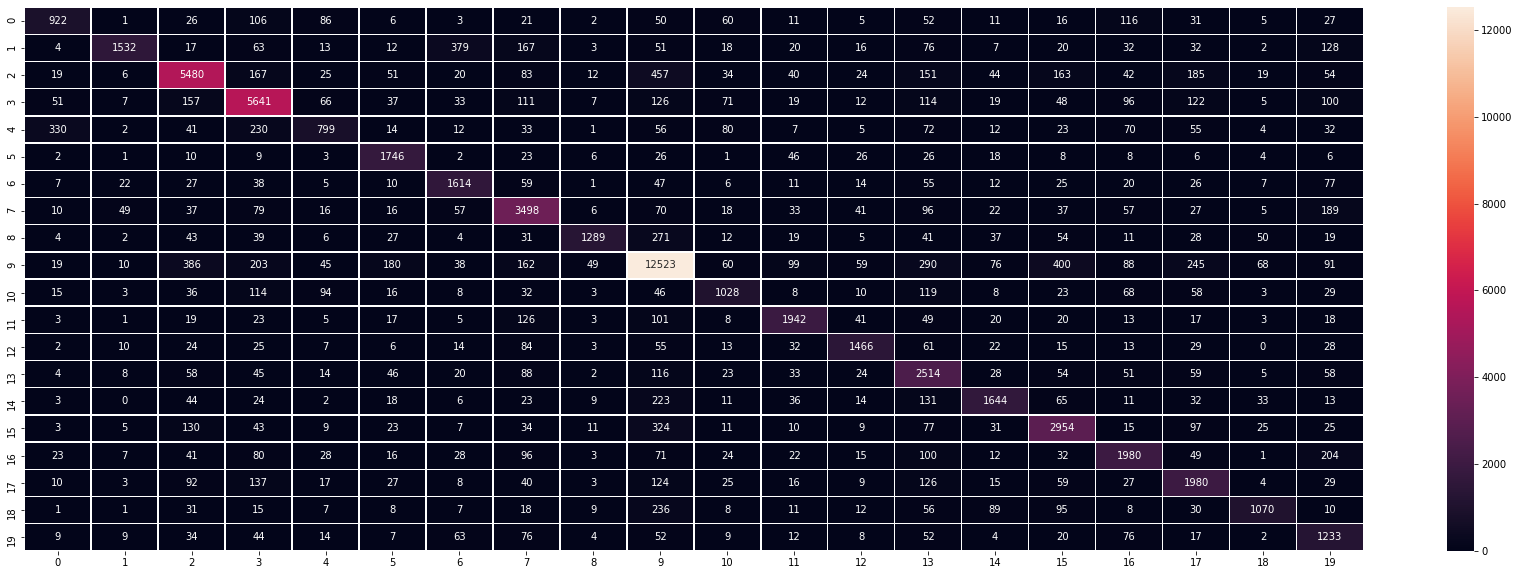

In [204]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,10))         # Sample figsize in inches
sns.heatmap(cf_matrix, annot=True, linewidths=.5, ax=ax,fmt='g')


The confusion matrix shows some interesting model performance trends.
--Label 0 and 4 associated with sarcastic remarks can be used interchangably, 
  therefore model have some inconsistency defferentiating among the two
--And Label 3 associated with laughter is also associated with sarcastic texts
--The emotion associted with heart 9 can be used in different contexts 



        ROC Curve on the Test set for the Model Performance 

In [253]:
y_test_prob = model.predict(X_test)


In [209]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

        Generating list of colors for ROC plot

In [303]:
from random import randint
color = []
n = 20
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

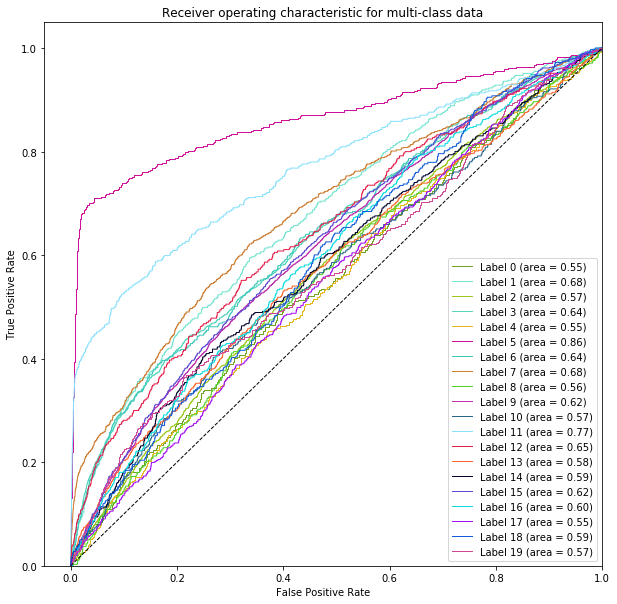

In [285]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=1

fig, ax = plt.subplots(figsize=(10,10))
for i in range(20):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(color)
for i, color in zip(range(20), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Label {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

The christmas tree, US label, and fire emojis are predicted by the model with high clarity

In [286]:
#Testing the Model with a sample
tokens[-10:-9]

[['just',
  'because',
  'my',
  'wrestling',
  'career',
  'is',
  'over',
  'doesnt',
  'mean',
  'i',
  'forgot',
  'how',
  'to',
  'scramble',
  'user']]

In [290]:
n=sequences[-10:-9]

newseqtest=[]
for s in n:
    x=range(0,35-len(s))
    for p in x:
        s.append(0)
    newseqtest.append(s)   

In [291]:
sample=newseqtest
sample = np.array(sample)

In [292]:
ysample = model.predict_classes(sample)
ysample

array([4], dtype=int64)

    Label 4 is Winking

In [294]:
dataLabel

,Unnamed: 0,emoticons,number
0,0,😜,0
1,1,📸,1
2,2,😍,2
3,3,😂,3
4,4,😉,4
5,5,🎄,5
6,6,📷,6
7,7,🔥,7
8,8,😘,8
9,9,❤,9
